<a href="https://colab.research.google.com/github/alka62/Task1_Titanic_Data_Cleaning/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔸 Upload your dataset: either 'train.csv' or 'titanic.zip' (from Kaggle) now.


Saving archive (4).zip to archive (4) (5).zip
Archive:  archive (4) (5).zip
  inflating: Titanic-Dataset.csv     
🔹 Raw data sample (before cleaning):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


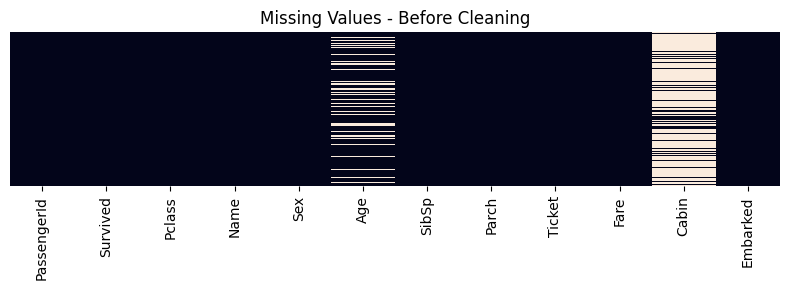


🔸 Cleaned data sample (after cleaning):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


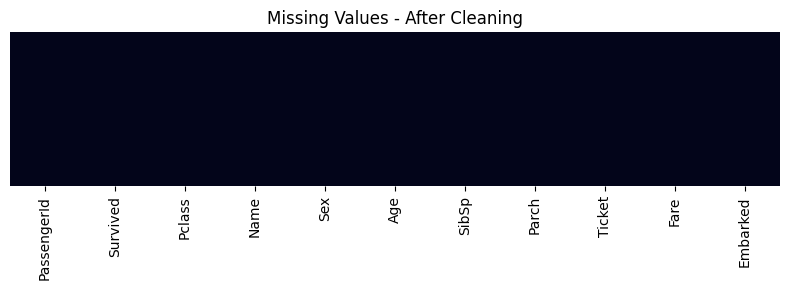

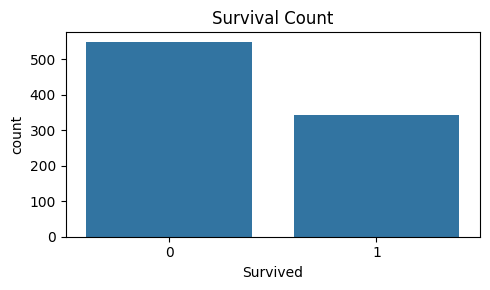

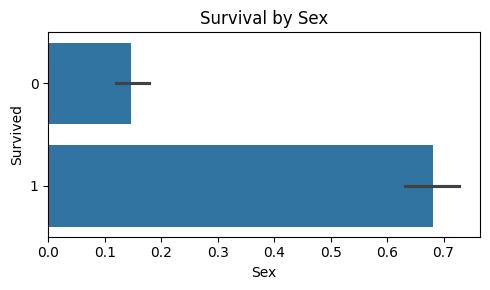

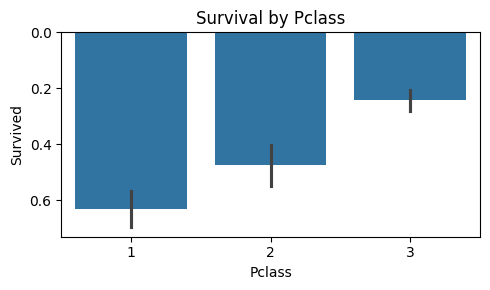


✅ Cleaned dataset saved as titanic_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Screenshots saved in 'screenshots/' folder: before/after and plots.
  adding: screenshots/ (stored 0%)
  adding: screenshots/after_cleaning_heatmap.png (deflated 20%)
  adding: screenshots/survival_by_sex.png (deflated 16%)
  adding: screenshots/survival_by_pclass.png (deflated 17%)
  adding: screenshots/survival_count.png (deflated 18%)
  adding: screenshots/before_cleaning_heatmap.png (deflated 17%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ====== Titanic Data Cleaning with Manual Upload Prompt ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Folder for screenshots
os.makedirs("screenshots", exist_ok=True)

# Step 0: Ask user to upload dataset if not present
from google.colab import files

if not os.path.exists("train.csv"):
    print("🔸 Upload your dataset: either 'train.csv' or 'titanic.zip' (from Kaggle) now.")
    uploaded = files.upload()  # user selects file(s)
    # If zipped, unzip it
    if "titanic.zip" in uploaded or any(name.lower().endswith(".zip") for name in uploaded):
        # find the zip name
        for name in uploaded:
            if name.lower().endswith(".zip"):
                !unzip -o "{name}"
    # If train.csv uploaded directly, it'll be in working dir

# Verify train.csv exists (or the unzipped file name)
file_to_load = "train.csv"
if not os.path.exists(file_to_load):
    # Check for the common unzipped file name
    if os.path.exists("Titanic-Dataset.csv"):
        file_to_load = "Titanic-Dataset.csv"
    else:
        raise FileNotFoundError("train.csv or Titanic-Dataset.csv nahi mila. Upload karo 'train.csv' ya 'titanic.zip'.")


# Step 1: Load original dataset
df_raw = pd.read_csv(file_to_load)
print("🔹 Raw data sample (before cleaning):")
display(df_raw.head())

# Step 2: Missing values heatmap before cleaning
plt.figure(figsize=(8,3))
sns.heatmap(df_raw.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values - Before Cleaning")
plt.tight_layout()
plt.savefig("screenshots/before_cleaning_heatmap.png", dpi=150)
plt.show()

# Step 3: Cleaning
df = df_raw.copy()

# Drop Cabin (bohot zyada missing)
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

# Fill Age with median
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Convert types
if 'Pclass' in df.columns:
    df['Pclass'] = df['Pclass'].astype('category')
if 'Survived' in df.columns:
    df['Survived'] = df['Survived'].astype('category')

# Step 4: Show cleaned sample
print("\n🔸 Cleaned data sample (after cleaning):")
display(df.head())

# Step 5: Missing heatmap after cleaning
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values - After Cleaning")
plt.tight_layout()
plt.savefig("screenshots/after_cleaning_heatmap.png", dpi=150)
plt.show()

# Optional basic visuals
if 'Survived' in df.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x='Survived', data=df)
    plt.title("Survival Count")
    plt.tight_layout()
    plt.savefig("screenshots/survival_count.png", dpi=120)
    plt.show()

    if {'Sex','Survived'}.issubset(df.columns):
        plt.figure(figsize=(5,3))
        sns.barplot(x='Sex', y='Survived', data=df)
        plt.title("Survival by Sex")
        plt.tight_layout()
        plt.savefig("screenshots/survival_by_sex.png", dpi=120)
        plt.show()

        if {'Pclass','Survived'}.issubset(df.columns):
            plt.figure(figsize=(5,3))
            sns.barplot(x='Pclass', y='Survived', data=df)
            plt.title("Survival by Pclass")
            plt.tight_layout()
            plt.savefig("screenshots/survival_by_pclass.png", dpi=120)
            plt.show()

# Step 6: Save cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as titanic_cleaned.csv")

# Step 7: Offer downloads (Colab)
try:
    files.download(file_to_load) # Use the actual file name loaded
    files.download("titanic_cleaned.csv")
except:
    pass

print("\nScreenshots saved in 'screenshots/' folder: before/after and plots.")

# Agar poora screenshots folder download karna hai:
!zip -r screenshots.zip screenshots
files.download("screenshots.zip")